In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

In [8]:
cd downloads

[WinError 2] The system cannot find the file specified: 'downloads'
C:\Users\18329\downloads


In [22]:

auto = pd.read_csv('Auto_clean.csv')

In [23]:
auto.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [24]:
auto= auto.iloc[:, 2:]
auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               201 non-null    object 
 1   fuel-type          201 non-null    object 
 2   aspiration         201 non-null    object 
 3   num-of-doors       201 non-null    object 
 4   body-style         201 non-null    object 
 5   drive-wheels       201 non-null    object 
 6   engine-location    201 non-null    object 
 7   wheel-base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb-weight        201 non-null    int64  
 12  engine-type        201 non-null    object 
 13  num-of-cylinders   201 non-null    object 
 14  engine-size        201 non-null    int64  
 15  fuel-system        201 non-null    object 
 16  bore               201 non

In [27]:
num_df = auto.select_dtypes(include=['int64','float'])
cat_df = auto.select_dtypes(include=['object'])

<AxesSubplot:>

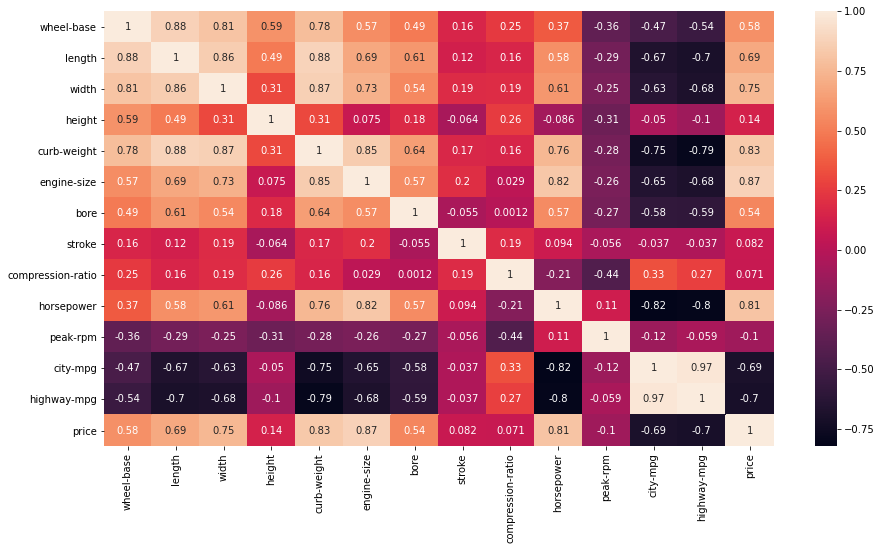

In [28]:
plt.subplots(figsize = (15,8))
sns.heatmap(num_df.corr(),annot= True)

In [29]:
#Getting absolute values correlation coeff and sorting values
num_corr_coff= num_df.corr()['price'].abs().sort_values()
num_corr_coff

compression-ratio    0.071107
stroke               0.082209
peak-rpm             0.102310
height               0.135486
bore                 0.543154
wheel-base           0.584642
city-mpg             0.686571
length               0.690628
highway-mpg          0.704692
width                0.751265
horsepower           0.810500
curb-weight          0.834415
engine-size          0.872335
price                1.000000
Name: price, dtype: float64

In [30]:
#Let's only keep columns with a correlation coefficient larger than 0.5
more_corr= num_corr_coff[num_corr_coff>0.5]
more_corr

bore           0.543154
wheel-base     0.584642
city-mpg       0.686571
length         0.690628
highway-mpg    0.704692
width          0.751265
horsepower     0.810500
curb-weight    0.834415
engine-size    0.872335
price          1.000000
Name: price, dtype: float64

In [31]:
#drop coloum with less that 0.5
auto= auto.drop(num_corr_coff[num_corr_coff < 0.5].index, axis=1)


In [32]:
#for analysis and prediction purpose category that contain
#more than 10 unique value should be droped
for col in cat_df:
    cat_df[col]= cat_df[col].astype('category')
print('UNIQUE VALUES: \n')
for i in cat_df.columns:
    print(i, ':' , cat_df[i].unique())

UNIQUE VALUES: 

make : ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', ..., 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Length: 22
Categories (22, object): ['alfa-romero', 'audi', 'bmw', 'chevrolet', ..., 'subaru', 'toyota', 'volkswagen', 'volvo']
fuel-type : ['gas', 'diesel']
Categories (2, object): ['gas', 'diesel']
aspiration : ['std', 'turbo']
Categories (2, object): ['std', 'turbo']
num-of-doors : ['two', 'four']
Categories (2, object): ['two', 'four']
body-style : ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
Categories (5, object): ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
drive-wheels : ['rwd', 'fwd', '4wd']
Categories (3, object): ['rwd', 'fwd', '4wd']
engine-location : ['front', 'rear']
Categories (2, object): ['front', 'rear']
engine-type : ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf']
Categories (6, object): ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf']
num-of-cylinders : ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
Cat

In [34]:
#as we can see is inappropiate to drop the make column cause the price depend on it

cat_dummies= pd.get_dummies(cat_df, drop_first=True)
cat_dummies.head() # why did you drop the first

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
auto= auto.drop(cat_df.columns, axis=1)
auto

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154.0,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102.0,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...
196,109.1,188.8,68.9,2952,141,3.78,114.0,23,28,16845.0
197,109.1,188.8,68.8,3049,141,3.78,160.0,19,25,19045.0
198,109.1,188.8,68.9,3012,173,3.58,134.0,18,23,21485.0
199,109.1,188.8,68.9,3217,145,3.01,106.0,26,27,22470.0


In [37]:
#now i can concact catdummies and auto
auto= pd.concat([cat_dummies,auto] ,axis=1)
auto.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,...,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price
0,0,0,0,0,0,0,0,0,0,0,...,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,13495.0
1,0,0,0,0,0,0,0,0,0,0,...,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,16500.0
2,0,0,0,0,0,0,0,0,0,0,...,94.5,171.2,65.5,2823,152,2.68,154.0,19,26,16500.0
3,1,0,0,0,0,0,0,0,0,0,...,99.8,176.6,66.2,2337,109,3.19,102.0,24,30,13950.0
4,1,0,0,0,0,0,0,0,0,0,...,99.4,176.6,66.4,2824,136,3.19,115.0,18,22,17450.0


In [38]:
#seperating into input and output
x= auto.iloc[:,:-1]
print(x.shape)
y= auto.iloc[:,-1:]
print(y.shape)

(201, 58)
(201, 1)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4, random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 58)
(120, 1)
(81, 58)
(81, 1)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [41]:
#ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
#categorical_df['num-of-doors'].fillna(categorical_df['num-of-doors'].mode()[0],inplace=True)


In [52]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [46]:
train_predict = model.predict(x_train)

metrics.r2_score(train_predict,y_train)

0.9732819172681122

In [48]:
test_predict= model.predict(x_test)
metrics.r2_score(test_predict,y_test)

0.8889144040033468

<AxesSubplot:xlabel='price'>

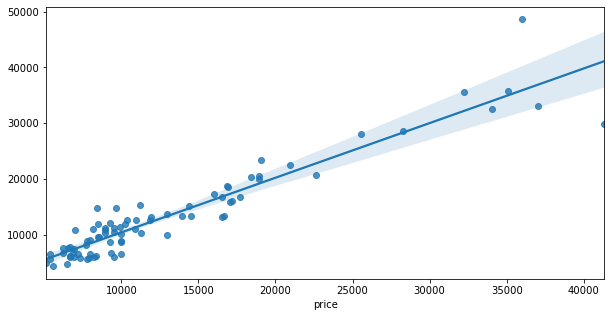

In [49]:
plt.subplots(figsize = (10,5))
sns.regplot(y_test, test_predict)

In [50]:
#recursive feature elimination with cross validation
from sklearn.feature_selection import RFECV

In [70]:
linear= LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator= linear, step=1, scoring='neg_mean_squared_error', cv=7)

# Fit recursive feature eliminator 
rfecv.fit(x_train, y_train)

# Number of best features
print(); print(rfecv)
print(); print(rfecv.n_features_)



RFECV(cv=7, estimator=LinearRegression(), scoring='neg_mean_squared_error')

45


In [71]:
print('Best features :', x_train.columns[rfecv.support_])

Best features : Index(['make_bmw', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar',
       'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mitsubishi',
       'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_gas', 'aspiration_turbo', 'num-of-doors_two',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'num-of-cylinders_five',
       'num-of-cylinders_four', 'num-of-cylinders_six',
       'num-of-cylinders_three', 'num-of-cylinders_two', 'fuel-system_2bbl',
       'fuel-system_idi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi', 'width', 'bore', 'city-mpg'],
      dtype='object')


In [72]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)   

# as rfecv will work only dataset with same number of features so we transform x_test

In [73]:
linear.fit(x_test_rfecv, y_test)


LinearRegression()

In [74]:
test_predict = linear.predict(x_test_rfecv)
metrics.r2_score(test_predict, y_test)

0.9368421099046255

<AxesSubplot:xlabel='price'>

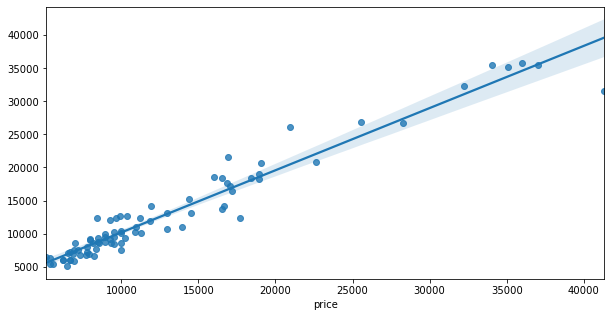

In [75]:
plt.subplots(figsize = (10,5))
sns.regplot(y_test, test_predict)